# Pymaceuticals Inc.
---

### Analysis

- In the original data set once both studies were cobmined we had 249 mice total, and after finding and removing the duplicates we have 248. Thus, showing that there was only 1 dubplicate in the over data. 
- Additionally, we can see a postive correlation between mouse weight and tumor size. As tumor size increased so did the weight of the mice. 
- From the finding in the charts we can state that Capomulin and Ramicane are effective drugs. Capomulin and Ramicane help more than Infubinol and Ceftamin at reducing size of tumors. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")                 

# Display the data table for preview
combined.head()       


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = combined["Mouse ID"].nunique()
number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dubplicant_mice = combined.loc[combined.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()
dubplicant_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined[combined['Mouse ID'].isin(dubplicant_mice)==False]
clean_mice_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Checking the number of mice in the clean DataFrame.
mice_check_clean = clean_mice_df["Mouse ID"].nunique()
mice_check_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
median = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
variance = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
Standard_diviation = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
SEM = clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()

Drug_Regimen_summary = pd.DataFrame ({    
    "Tumor Voluem Mean" : mean,
    "Tumor Voluem Median" : median,
    "Tumor Voluem Variance": variance,
    "Tumor Voluem Standard Diviation":Standard_diviation,
    "Tumor Voluem SEM":SEM })
Drug_Regimen_summary                  
                       
                       

,Tumor Voluem Mean,Tumor Voluem Median,Tumor Voluem Variance,Tumor Voluem Standard Diviation,Tumor Voluem SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Drug_Regimen_summary_agg = clean_mice_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
Drug_Regimen_summary_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Create Bar Charts and Pie Charts
Generate two bar charts. Both charts should be identical and show the total number of time points for all mice tested for each drug regimen throughout the study.

Create the first bar chart with the Pandas DataFrame.plot() method.

Create the second bar chart with Matplotlib's pyplot methods.

Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

Create the first pie chart with the Pandas DataFrame.plot() method.

Create the second pie chart with Matplotlib's pyplot methods

Text(0.5, 1.0, 'Number of Mice Per Treatment')

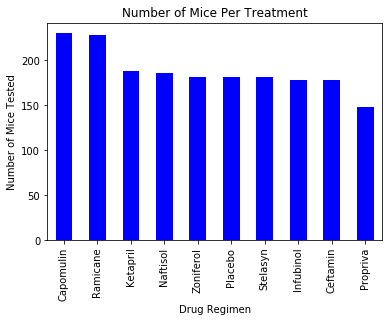

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_mice_df["Drug Regimen"].value_counts()
mice_count

plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Per Treatment")

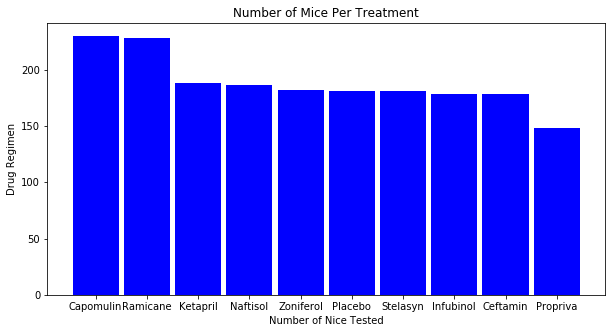

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# creating the dataset

drug_name = mice_count.index.values
each_mice_type = mice_count.count
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(drug_name, mice_count, color ='blue', width= 0.9)

 
plt.xlabel("Number of Nice Tested")
plt.ylabel("Drug Regimen",)
plt.title("Number of Mice Per Treatment")
plt.show()

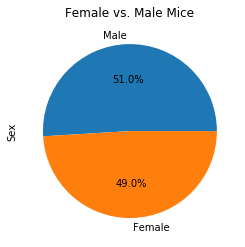

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mice_df["Sex"].value_counts()
sex_count
plt.title("Female vs. Male Mice")
sex_count.plot.pie(autopct= "%1.1f%%")

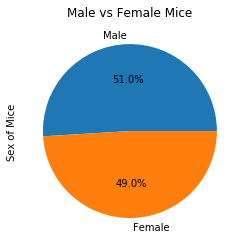

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotl
labels = ['Female', 'Male']
plot = sex_count.plot.pie(autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]


In [16]:
# Start by getting the last (greatest) timepoint for each mouse: Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
Capomulin_t = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_t.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile

print(f"Lower quartile of Capomulin tumors: {lower_quartile}")
print(f"Upper quartile of Capomulin tumors: {upper_quartile}")
print(f"Interquartile range of Capomulin tumors: {iqr}")
print(f"Median of Capomulin tumors: {quartiles[0.5]} ")
# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

Lower quartile of Capomulin tumors: 32.37735684
Upper quartile of Capomulin tumors: 40.1592203
Interquartile range of Capomulin tumors: 7.781863460000004
Median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [21]:
# Start by getting the last (greatest) timepoint for each mouse:Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
Ramicane_t = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_t.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile

print(f"Lower quartile of Ramicane tumors: {lower_quartile}")
print(f"Upper quartile of Ramicane tumors: {upper_quartile}")
print(f"Interquartile range of Ramicane tumors: {iqr}")
print(f"Median of Ramicane tumors: {quartiles[0.5]} ")
# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Lower quartile of Ramicane tumors: 31.56046955
Upper quartile of Ramicane tumors: 40.65900627
Interquartile range of Ramicane tumors: 9.098536719999998
Median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [34]:
# Start by getting the last (greatest) timepoint for each mouse:Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [35]:
Infubinol_t = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_t.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile

print(f"Lower quartile of Infubinol tumors: {lower_quartile}")
print(f"Upper quartile of Infubinol tumors: {upper_quartile}")
print(f"Interquartile range of Infubinol tumors: {iqr}")
print(f"Median of Infubinol tumors: {quartiles[0.5]} ")
# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Lower quartile of Infubinol tumors: 54.04860769
Upper quartile of Infubinol tumors: 65.52574285
Interquartile range of Infubinol tumors: 11.477135160000003
Median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [36]:
# Start by getting the last (greatest) timepoint for each mouse:Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [37]:
Ceftamin_t = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_t.quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile-lower_quartile

print(f"Lower quartile of Ceftamin tumors: {lower_quartile}")
print(f"Upper quartile of Ceftamin tumors: {upper_quartile}")
print(f"Interquartile range of Ceftamin tumors: {iqr}")
print(f"Median of Ceftamin tumors: {quartiles[0.5]} ")
# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Lower quartile of Ceftamin tumors: 48.72207785
Upper quartile of Ceftamin tumors: 64.29983003
Interquartile range of Ceftamin tumors: 15.577752179999997
Median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


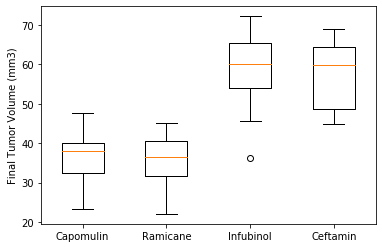

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [Capomulin_t, Ramicane_t, Infubinol_t, Ceftamin_t]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.5, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

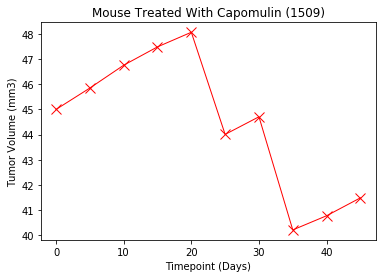

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#clean_mice_df


Capomulin_df = clean_mice_df.loc[clean_mice_df["Mouse ID"] == "l509",:]
Capomulin_df.head()
x_axis = Capomulin_df["Timepoint"]
tumsiz = Capomulin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Mouse Treated With Capomulin (1509)')
plt.plot(x_axis, tumsiz,linewidth=1, markersize=10,marker="x",color="red", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')




Text(0, 0.5, 'Average Tumor Volume (mm3)')

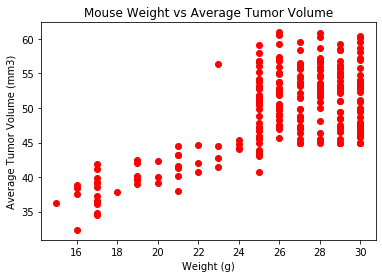

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_tumor = clean_mice_df.groupby(["Mouse ID"]).mean()
avg_tumor

plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'])

The correlation between mouse weight and the average tumor volume is 0.66


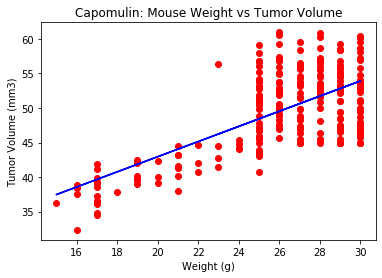

In [60]:
#plot the Correlation and Regression
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"],color='r')
plt.plot(avg_tumor["Weight (g)"], regress_values, color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs Tumor Volume")
plt.show()